In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [3]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [7]:
train_data = pd.read_csv("diabetic_data_train.csv")

In [9]:
train_data.drop('max_glu_serum', axis=1, inplace=True)
train_data.drop('A1Cresult', axis=1, inplace=True)
train_data.drop('medical_specialty', axis=1, inplace=True)
train_data.drop('payer_code', axis=1, inplace=True)
train_data.drop('number_outpatient', axis=1, inplace=True)
train_data.drop('number_emergency', axis=1, inplace=True)
train_data.drop('number_inpatient', axis=1, inplace=True)
train_data.drop('encounter_id', axis=1, inplace=True)
train_data.drop('patient_nbr', axis=1, inplace=True)
train_data.drop('weight', axis=1, inplace=True)

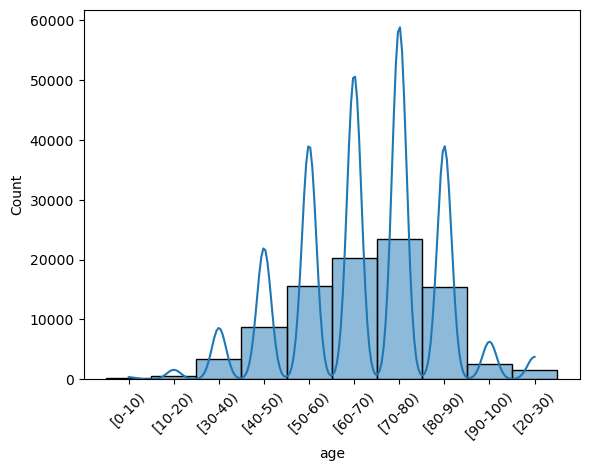

In [11]:
sns.histplot(train_data['age'], kde=True)
plt.xticks(rotation=45) 
plt.show()

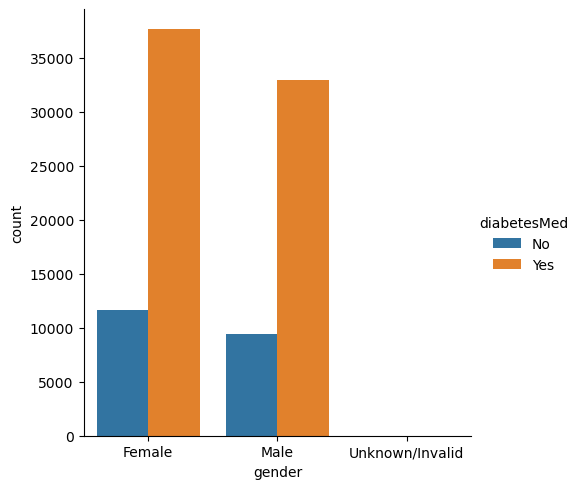

In [13]:
sns.catplot(x='gender', hue='diabetesMed', data=train_data, kind='count')
plt.show()

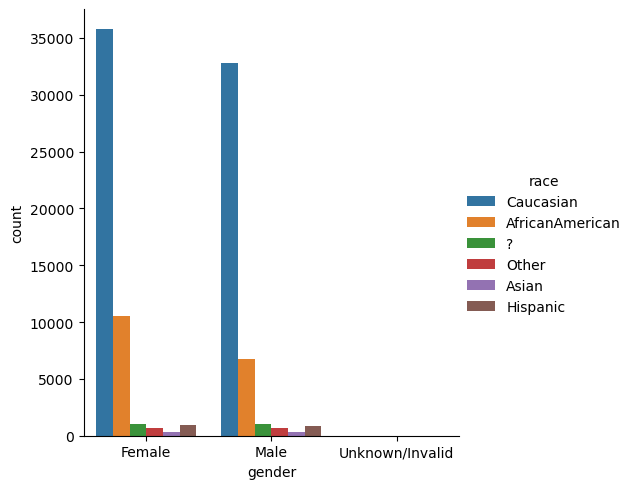

In [15]:
sns.catplot(x='gender', hue='race', data=train_data, kind='count')
plt.show()

In [17]:
race_map = {
    'Caucasian': 0,
    'AfricanAmerican': 1,
    'Other': 2,
    'Asian': 3,
    'Hispanic': 4,
    '?' : 2
}
train_data['race'] = train_data['race'].map(race_map)

In [19]:
gender_map = {'Male': 0, 'Female': 1}
train_data['gender'] = train_data['gender'].map(gender_map)

In [21]:
train_data['age'] = train_data['age'].str.replace('[', '').str.replace(')', '')
train_data['age'] = train_data['age'].apply(lambda x: (int(x.split('-')[0]) + int(x.split('-')[1])) / 2)

In [23]:
metformin_map = {
    'No': 0,
    'Steady': 1,
    'Up' : 2,
    'Down' : 3 
}
train_data['metformin'] = train_data['metformin'].map(metformin_map)

In [25]:
glimepiride_map = {
    'No': 0,
    'Steady': 1,
    'Up' : 2,
    'Down' : 3
}
train_data['glimepiride'] = train_data['glimepiride'].map(glimepiride_map)

In [27]:
insulin_map = {
    'No': 0,
    'Steady': 1,
    'Up' : 2,
    'Down' : 3
}
train_data['insulin'] = train_data['insulin'].map(insulin_map)

In [29]:
change_map = {
    'No': 0,
    'Ch': 1
}
train_data['change'] = train_data['change'].map(change_map)

In [31]:
diabetesMed_map = {
    'No': 0,
    'Yes': 1
}
train_data['diabetesMed'] = train_data['diabetesMed'].map(diabetesMed_map)

In [33]:
readmitted_map = {
    'NO': 0,
    '<30': 1,
    '>30': 1
}
train_data['readmitted'] = train_data['readmitted'].map(readmitted_map)

In [35]:
count_no = train_data[train_data['glimepiride'] == 'No'].shape[0]
total_count = train_data.shape[0]
percentage_no = (count_no / total_count) * 100
print(percentage_no)

0.0


In [37]:
train_data.drop('repaglinide', axis=1, inplace=True)
train_data.drop('nateglinide', axis=1, inplace=True)
train_data.drop('chlorpropamide', axis=1, inplace=True)
train_data.drop('acetohexamide', axis=1, inplace=True)
train_data.drop('glipizide', axis=1, inplace=True)
train_data.drop('glyburide', axis=1, inplace=True)
train_data.drop('tolbutamide', axis=1, inplace=True)
train_data.drop('tolazamide', axis=1, inplace=True)
train_data.drop('examide', axis=1, inplace=True)
train_data.drop('citoglipton', axis=1, inplace=True)
train_data.drop('glyburide-metformin', axis=1, inplace=True)
train_data.drop('glipizide-metformin', axis=1, inplace=True)
train_data.drop('glimepiride-pioglitazone', axis=1, inplace=True)
train_data.drop('metformin-rosiglitazone', axis=1, inplace=True)
train_data.drop('metformin-pioglitazone', axis=1, inplace=True)
train_data.drop('miglitol', axis=1, inplace=True)
train_data.drop('acarbose', axis=1, inplace=True)
train_data.drop('rosiglitazone', axis=1, inplace=True)
train_data.drop('pioglitazone', axis=1, inplace=True)
train_data.drop('troglitazone', axis=1, inplace=True)

In [39]:
diag_with_letters = train_data[
    train_data['diag_1'].str.contains(r'[A-Za-z]', na=False) |
    train_data['diag_2'].str.contains(r'[A-Za-z]', na=False) |
    train_data['diag_3'].str.contains(r'[A-Za-z]', na=False)
]

len(diag_with_letters)

7618

In [41]:
train_data['diag_1'] = train_data['diag_1'].apply(lambda x: x if str(x).isnumeric() else None)
train_data['diag_2'] = train_data['diag_2'].apply(lambda x: x if str(x).isnumeric() else None)
train_data['diag_3'] = train_data['diag_3'].apply(lambda x: x if str(x).isnumeric() else None)

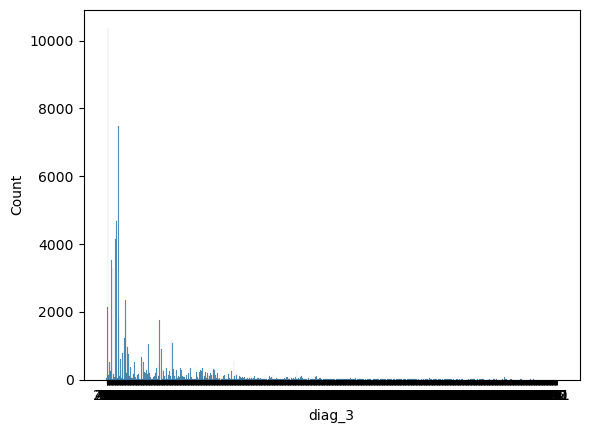

In [43]:
sns.histplot(train_data['diag_3'].dropna())
plt.show()

In [45]:
train_data['diag_1'] = pd.to_numeric(train_data['diag_1'], errors='coerce')
train_data['diag_2'] = pd.to_numeric(train_data['diag_2'], errors='coerce')
train_data['diag_3'] = pd.to_numeric(train_data['diag_3'], errors='coerce')

train_data['diag_1'] = train_data['diag_1'].fillna(train_data['diag_1'].median())
train_data['diag_2'] = train_data['diag_2'].fillna(train_data['diag_2'].median())
train_data['diag_3'] = train_data['diag_3'].fillna(train_data['diag_3'].median())

In [47]:
train_data = train_data.dropna(subset=['gender'])

In [49]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 91586 entries, 0 to 91588
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                91586 non-null  int64  
 1   race                      91586 non-null  int64  
 2   gender                    91586 non-null  float64
 3   age                       91586 non-null  float64
 4   admission_type_id         91586 non-null  int64  
 5   discharge_disposition_id  91586 non-null  int64  
 6   admission_source_id       91586 non-null  int64  
 7   time_in_hospital          91586 non-null  int64  
 8   num_lab_procedures        91586 non-null  int64  
 9   num_procedures            91586 non-null  int64  
 10  num_medications           91586 non-null  int64  
 11  diag_1                    91586 non-null  float64
 12  diag_2                    91586 non-null  float64
 13  diag_3                    91586 non-null  float64
 14  number_diag

In [51]:
X = train_data[['race', 'gender', 'age', 'admission_type_id', 'discharge_disposition_id', 
                'admission_source_id', 'time_in_hospital', 'num_lab_procedures', 
                'num_procedures', 'num_medications', 'diag_1', 'diag_2', 'diag_3', 
                'number_diagnoses', 'metformin', 'glimepiride', 'insulin', 'change', 
                'diabetesMed']]

y = train_data['readmitted']

In [53]:
numerical_cols = ['age', 'time_in_hospital', 'num_lab_procedures', 
                  'num_procedures', 'num_medications', 'number_diagnoses']

scaler = StandardScaler()
X.loc[:, numerical_cols] = scaler.fit_transform(X[numerical_cols])


C:\Users\Hp\AppData\Local\Temp\ipykernel_1236\4256947752.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-1.13621327 -0.46657644 -0.80139485 ... -1.13621327  1.87715246
  0.5378788 ]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X.loc[:, numerical_cols] = scaler.fit_transform(X[numerical_cols])
C:\Users\Hp\AppData\Local\Temp\ipykernel_1236\4256947752.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.10622704  0.80768129  0.04609102 ...  0.50304518  0.0968637
 -1.52786222]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X.loc[:, numerical_cols] = scaler.fit_transform(X[numerical_cols])
C:\Users\Hp\AppData\Local\Temp\ipykernel_1236\4256947752.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of p

In [55]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

In [57]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

#param_grid_rf = {
 #   'n_estimators': [50, 100, 200],
  #  'max_depth': [None, 10, 20, 30],
   # 'min_samples_split': [2, 5, 10]
#}

#grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, cv=5)
#grid_search_rf.fit(X_train, y_train)
#print("Best parameters for Random Forest:", grid_search_rf.best_params_)

RandomForestClassifier()

In [59]:
y_pred_rf = rf_model.predict(X_valid)

conf_matrix_rf = confusion_matrix(y_valid, y_pred_rf)
print("Confusion Matrix for Random Forest:\n", conf_matrix_rf)

accuracy = accuracy_score(y_valid, y_pred_rf)
print(f'Accuary of model {accuracy:.2f}')

Confusion Matrix for Random Forest:
 [[6693 3100]
 [4156 4369]]
Accuary of model 0.60


In [61]:
svm_model = SVC()
svm_model.fit(X_train, y_train)

#param_grid_svm = {
 #   'C': [0.1, 1, 10, 100],
  #  'kernel': ['linear', 'rbf', 'poly'],
   # 'gamma': ['scale', 'auto']
#}

#grid_search_svm = GridSearchCV(estimator=svm_model, param_grid=param_grid_svm, cv=5)
#grid_search_svm.fit(X_train, y_train)
#print("Best parameters for SVM:", grid_search_svm.best_params_)

SVC()

In [63]:
y_pred_svm = svm_model.predict(X_valid)

conf_matrix_svm = confusion_matrix(y_valid, y_pred_svm)
print("Confusion Matrix for SVM:\n", conf_matrix_svm)

accuracy = accuracy_score(y_valid, y_pred_svm)
print(f'Accuary of model {accuracy:.2f}')

Confusion Matrix for SVM:
 [[9793    0]
 [8525    0]]
Accuary of model 0.53


In [77]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

#param_grid_lr = {
 #   'fit_intercept': [True, False]     
#}

#grid_search_lr = GridSearchCV(estimator=lr_model, param_grid=param_grid_lr, cv=5)
#grid_search_lr.fit(X_train, y_train)
#print("Best parameters for Linear Regression:", grid_search_lr.best_params_)

Best parameters for Linear Regression: {'fit_intercept': True}


In [81]:
y_pred_lr = lr_model.predict(X_valid)

mse_lr = mean_squared_error(y_valid, y_pred_lr)
print(f"Mean Squared Error for Linear Regression: {mse_lr:.2f}")

r2_lr = grid_search_lr.score(X_valid, y_valid)
print(f"R^2 Score for Linear Regression: {r2_lr:.2f}")

Mean Squared Error for Linear Regression: 0.24
R^2 Score for Linear Regression: 0.03


In [61]:
X_test = pd.read_csv('diabetic_data_test.csv')

X_test.drop('max_glu_serum', axis=1, inplace=True)
X_test.drop('A1Cresult', axis=1, inplace=True)
X_test.drop('medical_specialty', axis=1, inplace=True)
X_test.drop('payer_code', axis=1, inplace=True)
X_test.drop('number_outpatient', axis=1, inplace=True)
X_test.drop('number_emergency', axis=1, inplace=True)
X_test.drop('number_inpatient', axis=1, inplace=True)
X_test.drop('encounter_id', axis=1, inplace=True)
X_test.drop('patient_nbr', axis=1, inplace=True)
X_test.drop('weight', axis=1, inplace=True)

race_map = {
    'Caucasian': 0,
    'AfricanAmerican': 1,
    'Other': 2,
    'Asian': 3,
    'Hispanic': 4,
    '?' : 2
}
X_test['race'] = X_test['race'].map(race_map)

gender_map = {'Male': 0, 'Female': 1}
X_test['gender'] = X_test['gender'].map(gender_map)

X_test['age'] = X_test['age'].str.replace('[', '').str.replace(')', '')
X_test['age'] = X_test['age'].apply(lambda x: (int(x.split('-')[0]) + int(x.split('-')[1])) / 2)

metformin_map = {
    'No': 0,
    'Steady': 1,
    'Up' : 2,
    'Down' : 3 
}
X_test['metformin'] = X_test['metformin'].map(metformin_map)

glimepiride_map = {
    'No': 0,
    'Steady': 1,
    'Up' : 2,
    'Down' : 3
}
X_test['glimepiride'] = X_test['glimepiride'].map(glimepiride_map)

insulin_map = {
    'No': 0,
    'Steady': 1,
    'Up' : 2,
    'Down' : 3
}
X_test['insulin'] = X_test['insulin'].map(insulin_map)

change_map = {
    'No': 0,
    'Ch': 1
}
X_test['change'] = X_test['change'].map(change_map)

diabetesMed_map = {
    'No': 0,
    'Yes': 1
}
X_test['diabetesMed'] = X_test['diabetesMed'].map(diabetesMed_map)

X_test.drop('repaglinide', axis=1, inplace=True)
X_test.drop('nateglinide', axis=1, inplace=True)
X_test.drop('chlorpropamide', axis=1, inplace=True)
X_test.drop('acetohexamide', axis=1, inplace=True)
X_test.drop('glipizide', axis=1, inplace=True)
X_test.drop('glyburide', axis=1, inplace=True)
X_test.drop('tolbutamide', axis=1, inplace=True)
X_test.drop('tolazamide', axis=1, inplace=True)
X_test.drop('examide', axis=1, inplace=True)
X_test.drop('citoglipton', axis=1, inplace=True)
X_test.drop('glyburide-metformin', axis=1, inplace=True)
X_test.drop('glipizide-metformin', axis=1, inplace=True)
X_test.drop('glimepiride-pioglitazone', axis=1, inplace=True)
X_test.drop('metformin-rosiglitazone', axis=1, inplace=True)
X_test.drop('metformin-pioglitazone', axis=1, inplace=True)
X_test.drop('miglitol', axis=1, inplace=True)
X_test.drop('acarbose', axis=1, inplace=True)
X_test.drop('rosiglitazone', axis=1, inplace=True)
X_test.drop('pioglitazone', axis=1, inplace=True)
X_test.drop('troglitazone', axis=1, inplace=True)

diag_with_letters = X_test[
    X_test['diag_1'].str.contains(r'[A-Za-z]', na=False) |
    X_test['diag_2'].str.contains(r'[A-Za-z]', na=False) |
    X_test['diag_3'].str.contains(r'[A-Za-z]', na=False)
]

len(diag_with_letters)

X_test['diag_1'] = X_test['diag_1'].apply(lambda x: x if str(x).isnumeric() else None)
X_test['diag_2'] = X_test['diag_2'].apply(lambda x: x if str(x).isnumeric() else None)
X_test['diag_3'] = X_test['diag_3'].apply(lambda x: x if str(x).isnumeric() else None)

X_test['diag_1'] = pd.to_numeric(X_test['diag_1'], errors='coerce')
X_test['diag_2'] = pd.to_numeric(X_test['diag_2'], errors='coerce')
X_test['diag_3'] = pd.to_numeric(X_test['diag_3'], errors='coerce')

X_test['diag_1'] = X_test['diag_1'].fillna(X_test['diag_1'].median())
X_test['diag_2'] = X_test['diag_2'].fillna(X_test['diag_2'].median())
X_test['diag_3'] = X_test['diag_3'].fillna(X_test['diag_3'].median())

X_test = X_test.dropna(subset=['gender'])

numerical_cols = ['age', 'time_in_hospital', 'num_lab_procedures', 
                  'num_procedures', 'num_medications', 'number_diagnoses']

scaler = StandardScaler()
X_test.loc[:, numerical_cols] = scaler.fit_transform(X_test[numerical_cols])

C:\Users\Hp\AppData\Local\Temp\ipykernel_1236\433074828.py:113: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 1.01268905  0.30204354  0.30204354 ... -1.11924746  2.0786573
  0.65736629]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_test.loc[:, numerical_cols] = scaler.fit_transform(X_test[numerical_cols])
C:\Users\Hp\AppData\Local\Temp\ipykernel_1236\433074828.py:113: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.00515595  0.92027851 -0.37532974 ...  0.503833    0.13365922
 -1.34703592]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_test.loc[:, numerical_cols] = scaler.fit_transform(X_test[numerical_cols])
C:\Users\Hp\AppData\Local\Temp\ipykernel_1236\433074828.py:113: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise

In [65]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

if 'Unnamed: 0' in X_test.columns:
    X_test = X_test.drop(columns=['Unnamed: 0'])

y_pred = model.predict(X_test)

X_test['readmitted'] = y_pred

output = X_test[['readmitted']]
output.to_csv('predicted_readmitted.csv', index=False)